In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import os
from astropy.timeseries import LombScargle 
from jdcal import gcal2jd
from CosinorPy import cosinor, cosinor1

In [107]:
def data_orgaziner(file_name):

    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    folder_path = 'Data'
    file_path = os.path.join(folder_path, file_name)
    
    df = pd.read_csv(file_path, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    deleted_data = df[df["MonStatus"] != 1]
    print(f"Removed rows of data where Monitor Status is not 1: {len(deleted_data)}\n")
    df = df[df["MonStatus"] == 1]
    
    
    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')
    
    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                         month=df['Date'].dt.month,
                                         day=df['Date'].dt.day,
                                         hour=df['Time'].dt.hour,
                                         minute=df['Time'].dt.minute,
                                         second=df['Time'].dt.second))
    
    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)
    
    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}
    
    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    spiders = []
    
    for i in range(1, 33):
        if df[f"Sp{i}"].sum() > 10:
            spiders.append(i)
        if not i in spiders:
            df = df.drop([f"Sp{i}"], axis=1)

    return df, spiders

def naming_pattern(file_name):
    group_name = file_name.split(' ', 2)[0]
    light_condition = file_name.split(' ', 2)[1]
    start_date = file_name.split(' ', 2)[2].split('-', 1)[0]
    
    path = group_name + "_" + light_condition + "_" + start_date
    
    two_lights = False
    if "-" in light_condition:
        #li_con_1, li_con_2 = light_condition.split('-', 1)
        two_lights = True

    return group_name, light_condition, start_date, path, two_lights

StA LD-DD 0118-0201-2024.txt 

Removed rows of data where Monitor Status is not 1: 0



,Day,Time,Light,Sp3,Sp4,Sp5,Sp6,Sp7,Sp9,Sp10,...,Sp15,Sp16,Sp17,Sp18,Sp19,Sp21,Sp22,Sp23,Sp24,Sp25
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,15,9,12,10,17,11,6,...,5,8,5,10,11,5,4,6,6,4
2,1,2024-01-18 13:18:00,1,0,0,1,0,1,1,0,...,1,0,1,4,0,0,0,1,0,0
3,1,2024-01-18 13:19:00,1,0,0,1,0,2,4,0,...,6,0,2,0,0,0,0,3,0,20
4,1,2024-01-18 13:20:00,1,0,4,3,0,1,0,0,...,4,0,1,1,0,0,0,0,0,9
5,1,2024-01-18 13:21:00,1,0,3,3,0,0,0,0,...,2,0,3,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


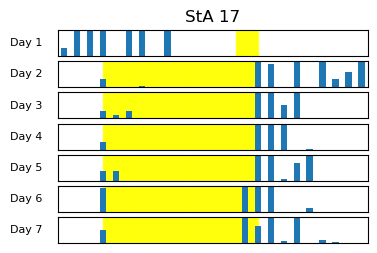

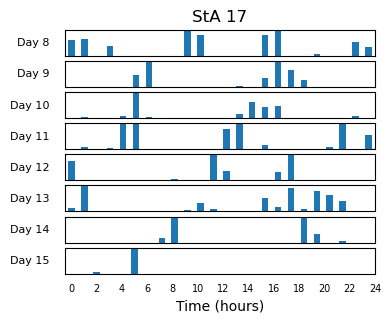

3 LD   23.15796039295182
4 LD   23.888048898182404
5 LD   31.835369774919617
6 LD   12.2828550161277
7 LD   23.92653455775737
9 LD   21.216
10 LD   12.062378167641326
11 LD   23.671023270640738
12 LD   23.281392067722216
13 LD   23.94582392776524
14 LD   12.0
15 LD   23.633354551241247
16 LD   22.953941267387947
17 LD   23.67479674796748
18 LD   23.96514442472164
19 LD   24.07782101167315
21 LD   23.73913043478261
22 LD   23.554639175257734
23 LD   12.082004555808656
24 LD   48.0
25 LD   24.523117569352706
3 DD   20.76991219208952
4 DD   26.3857847976308
5 DD   14.117199672538092
6 DD   19.548599429532654
7 DD   25.604751412970593
9 DD   22.36532507739938
10 DD   25.403982321912274
11 DD   25.057466954157682
12 DD   12.45546261562478
13 DD   14.35604371995596
14 DD   22.02802043843745
15 DD   25.26351606805293
16 DD   26.26134800550206
17 DD   15.711732894427463
18 DD   14.158703252463186
19 DD   12.861824218656016
21 DD   24.86515651890786
22 DD   23.392963416768772
23 DD   14.3873398

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:134: RuntimeWarning: invalid value encountered in divide
  power /= YY


In [121]:

"""

file_name = 'StA LD 1117-1128-2023.txt'

df, spiders = data_orgaziner(file_name)

display(df)

group_name, light_condition, start_date, path, two_lights = naming_pattern(file_name)

#print(group_name, light_condition, start_date, path, two_lights)


"""

folder_path = 'Data'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


for file_name in files:
    if file_name == "StA LD-DD 0118-0201-2024.txt":
        print(file_name, "\n")
        df, spiders = data_orgaziner(file_name)
        display(df)
        group_name, light_condition, start_date, path, two_lights = naming_pattern(file_name)
        condition_days, condition_keys = light_code(df)

        for light in condition_keys:
            for i in spiders:
                if i == 17:
                    fig = plt.figure(figsize=(4, 6))
                    raster_plot_2(f"Sp{i}", fig, light)

        LS_path = "LS_" + path

        if not os.path.exists(LS_path):
            os.makedirs(LS_path)
        
        for light in condition_keys:
            for i in spiders:
                LS_period_approx = period_LS(df, f"Sp{i}", light, 'value')
                print(i, light, " ", LS_period_approx)








# Light code

In [109]:
def light_code(df):
    LL_days = []
    LD_days = []
    
    for j in range(1, len(df['Day'].unique()) + 1):
        curr_df = df[df['Day']==j]
    
        if curr_df['Light'].sum() > 10:
            if curr_df['Light'].sum() > 1000:
                LL_days.append(j)
            else:
                LD_days.append(j)
    
    condition_days = {}
    
    condition_days['LD'] = LD_days
    
    condition_days['DD'] = [x for x in df['Day'].unique() if not x in LL_days and not x in LD_days]
    
    condition_days['LL'] = LL_days
    
    
    """
    if two_lights:
        name_wrong = li_con_1 == 
        
    if light_condition == 
    
    li_con_1, li_con_2
    """
    
    condition_keys = [key for key in condition_days if condition_days[key]]

    return condition_days, condition_keys
    


In [111]:
condition_days, condition_keys = light_code(df)
print(condition_days)

{'LD': [1, 2, 3, 4, 5, 6, 7], 'DD': [8, 9, 10, 11, 12, 13, 14, 15], 'LL': []}


# Raster Plot Code

In [113]:
def raster_plot_2(sp, fig, light_con):
    for j in condition_days[light_con]:
        curr_df = df[df['Day']==j]

        curr_df_avg = curr_df.groupby(curr_df['Time'].dt.hour)[sp].mean()
    
        ax = fig.add_subplot(len(df['Day'].unique()), 1, j)
        ax.set_ylabel(f"Day {j}", rotation="horizontal", va="center", ha="right", fontsize=8)

        
        for k in range(0, len(curr_df) -1):
            start_time = curr_df['Time'].iloc[k]
            end_time = curr_df['Time'].iloc[k + 1]
            if curr_df['Light'].iloc[k] == 1:
                ax.axvspan(start_time.hour + start_time.minute / 60, end_time.hour + end_time.minute / 60, color='yellow', alpha=0.3)

        curr_df_avg.plot.bar(y = [sp], ax=ax)
        
        ax.set_ylim(0, 1)
        ax.legend().remove()
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xlim(-0.5, 23.5)
        ax.set_xlabel("")
        
        if j == condition_days[light_con][0]:
            ax.set_title(f"{group_name} {sp.split('p', 2)[1]}")
            #ax.text(0.5, 1.5, x, fontsize=12, horizontalalignment='center', transform=ax.transAxes)
            
        if j == len(df["Day"].unique()):
            ax.set_xticks(np.arange(0, 25, 2))
            ax.set_xticklabels(np.arange(0, 25, 2), rotation = 'horizontal', fontsize = 7)
            ax.set_xlabel('Time (hours)')
        

    """
    file_path = os.path.join(raster_path, f"{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}_raster_plot.png")
    plt.savefig(file_path)
    """
    #plt.close()
    plt.show()

In [115]:
def raster_plot(sp, fig, light_con):
    for j in condition_days[light_con]:
        curr_df = df[df['Day']==j]

        #curr_df_avg = curr_df.groupby(curr_df['Time'].dt.hour)[sp].mean()
    
        ax = fig.add_subplot(len(df['Day'].unique()), 1, j)
        ax.set_ylabel(j, rotation="horizontal", va="center", ha="right", fontsize=8)

        
        for k in range(0, len(curr_df) -1):
            start_time = curr_df['Time'].iloc[k]
            end_time = curr_df['Time'].iloc[k + 1]
            if curr_df['Light'].iloc[k] == 1:
                ax.axvspan(start_time.hour * 60 + start_time.minute, end_time.hour * 60 + end_time.minute, color='yellow', alpha=0.3)

        curr_df.plot.bar(y = [sp], ax=ax)
        
        ax.set_ylim(0, 5)
        ax.legend().remove()
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xlim(-0.5, 1440.5)
        ax.set_xlabel("")
        
        if j == condition_days[light_con][0]:
            ax.set_title(f"{group_name} {sp.split('p', 2)[1]}")
            #ax.text(0.5, 1.5, x, fontsize=12, horizontalalignment='center', transform=ax.transAxes)
            
        if j == len(df["Day"].unique()):
            ax.set_xticks(np.arange(0, 25, 2))
            ax.set_xticklabels(np.arange(0, 25, 2), rotation = 'horizontal', fontsize = 7)
            ax.set_xlabel('Time (hours)')
        

    """
    file_path = os.path.join(raster_path, f"{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}_raster_plot.png")
    plt.savefig(file_path)
    """
    #plt.close()
    plt.show()

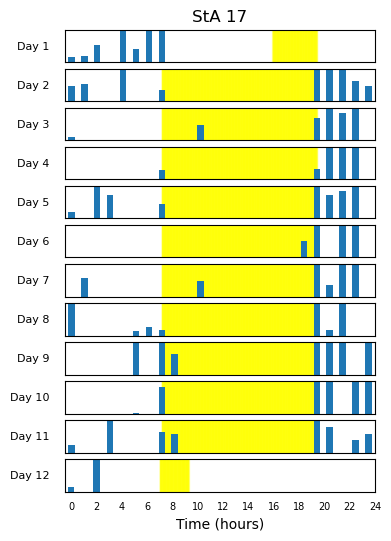

'\nKhA LD 0604-0607-2024\n\nLittle data spiders: 4, 10, 11, 12, 14\n\nNot at the cork spiders (beginning): 4, 9, 11, 12, 13, 14\n\n'

In [78]:
raster_path = path + "_raster_plots"

if not os.path.exists(raster_path):
    os.makedirs(raster_path)


x = "Sp17"

fig1 = plt.figure(figsize=(4, 6))
raster_plot_2(x, fig1, 'LD')

#fig2 = plt.figure(figsize=(4, 6))
#raster_plot_2(x, fig2, 'DD')

"""

for light in condition_keys:
    for i in spiders:
        fig = plt.figure(figsize=(4, 6))
        raster_plot(f"Sp{i}", fig, light)


"""



"""
KhA LD 0604-0607-2024

Little data spiders: 4, 10, 11, 12, 14

Not at the cork spiders (beginning): 4, 9, 11, 12, 13, 14

"""


In [195]:
def datetime_to_jd(dt):
    year, month, day = dt.year, dt.month, dt.day
    hour, minute, second = dt.hour, dt.minute, dt.second
    _, jd = gcal2jd(year, month, day)
    jd += (hour + minute / 60 + second / 3600) / 24
    return jd


# value, display, save, dis+save

def period_LS(df, sp, light_con, result_type='value'):
    if result_type != 'value' and result_type != 'display' and result_type != 'save' and result_type != 'dis+save':
        print("The 'result_type' parameter only takes in 'value', 'display', 'save', 'dis+save'.")
        return None
    
    first_day = condition_days[light_con][0]
    last_day = condition_days[light_con][-1]
    
    curr_df = df[(df["Day"] >= first_day) & (df["Day"] <= last_day)]

    activity = np.array(curr_df[sp])
    time = curr_df['Time'].apply(datetime_to_jd)

    ls = LombScargle(time, activity)
    freq = np.linspace(0.5, 2, len(activity))
    power = ls.power(freq)
    
    max_power = np.max(power)
    max_freq = freq[np.argmax(power)]

    periods = 1 / freq * 24
    power_new = power.copy()

    fap = ls.false_alarm_probability(max_power)

    print(fap)

    """
    
    while max_freq > 1.9 or max_freq < 0.75:
        max_power_indices = np.where(power_new == max_power)[0]
        power_new = np.delete(power_new, max_power_indices)
        #periods = np.delete(periods, max_power_indices)
        
        max_power = np.max(power_new)
        max_freq = freq[np.argmax(power_new)]

    """
    
    period = 1 / max_freq
    period *= 24
    #print(f"The Lomb-Scargle approximation of the period is {period} hours.")

    if result_type != 'value':
        plt.figure(figsize=(10, 6))
        plt.plot(periods, power)
        plt.scatter(period, max_power, s=75, c="red")
        plt.xlabel('Period (hours)')
        plt.ylabel('Power')
        plt.xlim(12, 36)
        plt.xticks(np.arange(12, 37, 2))
        plt.title(f'Lomb-Scargle Periodogram for {group_name} {sp.split("p", 2)[1]}')
        
        if result_type == 'display':
            plt.show()

        if result_type == 'save':
            file_path = os.path.join(LS_path, f"LS_{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}.png")
            plt.savefig(file_path)
            plt.close()

        if result_type == 'dis+save':
            file_path = os.path.join(LS_path, f"LS_{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}.png")
            plt.savefig(file_path)
            plt.show()

    return period



0.9999999999999997


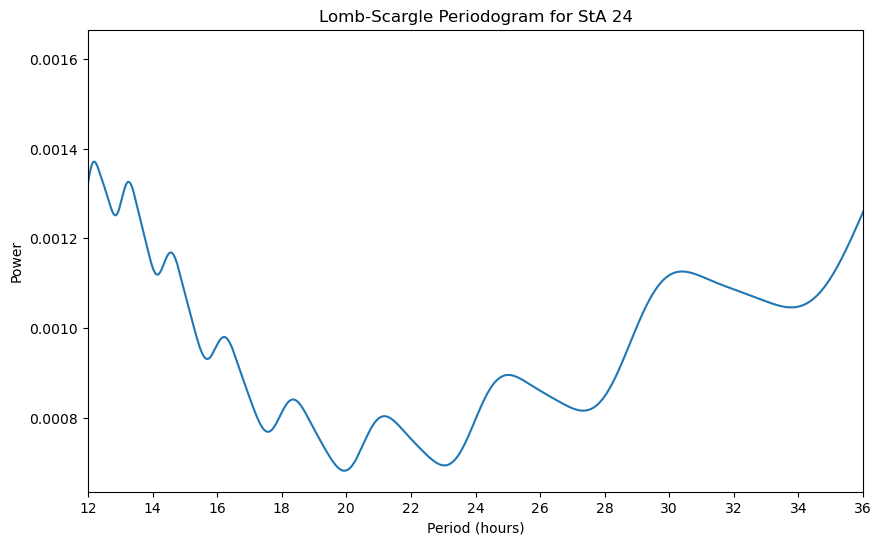

Sp24 DD   48.0 





'\n\nfor light in condition_keys:\n    for i in spiders:\n        LS_period_approx = period_LS(df, f"Sp{i}", light, \'value\')\n        print(i, light, " ", LS_period_approx)\n\n'

In [197]:
LS_path = "LS_" + path

if not os.path.exists(LS_path):
    os.makedirs(LS_path)




x = "Sp24"
LS_period_approx = period_LS(df, x, 'LD', 'display')
print(x, 'DD', " ", LS_period_approx, "\n\n\n")



"""

LS_period_approx = period_LS(df, x, 'DD', 'display')
print(x, 'DD', " ", LS_period_approx)

"""

"""

for light in condition_keys:
    for i in spiders:
        LS_period_approx = period_LS(df, f"Sp{i}", light, 'value')
        print(i, light, " ", LS_period_approx)

"""


# Cosinor Period Estimate: Built in Version 

In [17]:
import CosinorPy

In [19]:
from CosinorPy import cosinor_nonlin
def cosinor_period_approx(df, sp):
    X = df['Time'].apply(datetime_to_jd).values
    Y = df[sp].values

    popt_ext, statistics, statistics_params = cosinor_nonlin.fit_generalized_cosinor(X,Y, period=None, min_per = 5, max_per=36, plot=True, plot_margins=False, save_to = "", x_label="time [h]", y_label="measurements", test="", hold_on=False, color="black")
    period_approx = statistics_params['params']['period']
    print(popt_ext, statistics, statistics_params)
    print('The approximated period is:', period_approx)

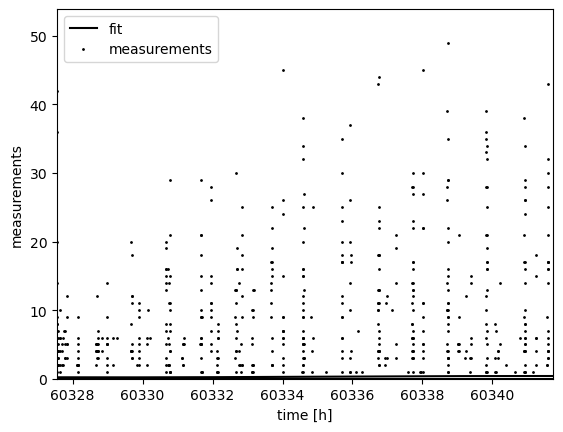

[ 4.05682027e-01  1.00582633e-01 -5.15590690e-07 -1.80094773e-06
  1.08626731e-02  2.40020927e+01] {'p': 0.0009959499410326922, 'p_reject': 1.1102230246251565e-16, 'SNR': 0.031698219576786826, 'RSS': 108738.55000775655, 'resid_SE': 2.30790047550527, 'ME': 4.523670011011291} {'params': {'A': 0.40568202711201984, 'B': 0.1005826328139494, 'C': -5.155906904952669e-07, 'D': -1.8009477274482337e-06, 'acrophase': 0.010862673145296143, 'period': 24.002092697826725}, 'p_values': {'A': 0.9997955804836369, 'B': 0.999978676344105, 'C': 0.9999993369681446, 'D': 0.9999452542652549, 'acrophase': 0.9999703322669655, 'period': 0.0}, 'CIs': {'A': [-3103.2389583808936, 3104.050322435118], 'B': [-7376.731827521747, 7376.932992787374], 'C': [-1.2161284263469165, 1.2161273951655354], 'D': [-0.051448723560530894, 0.051445121665076], 'acrophase': [-572.6017804075574, 572.623505753848], 'period': [23.12424646405239, 24.87993893160106]}}
The approximated period is: 24.002092697826725


In [21]:
cosinor_period_approx(df, 'Sp25')

# Cosinor Period Approximation: Periodogram Version

In [23]:
#nonlinear cosinor model for period estimate 
from CosinorPy import cosinor_nonlin
from scipy import signal

def cosinor_period_approx_2(df, sp):
    X = df['Time'].apply(datetime_to_jd).values
    Y = df[sp].values
    _, _, statistics_params_basic = cosinor_nonlin.fit_cosinor_basic(X, Y, period=None)
    initial_period = statistics_params_basic['params']['period']
    initial_period_ci = statistics_params_basic['CIs']['period']
    
    # Step 2: Compute the periodogram and identify the dominant period
    frequency, power = LombScargle(X, Y).autopower()
    best_frequency = frequency[np.argmax(power)]
    best_period = 1 / best_frequency
    
    # Step 3: Refine the period estimate using fit_generalized_cosinor
    popt_ext, statistics, statistics_params = cosinor_nonlin.fit_generalized_cosinor(X, Y, period=best_period)
    
    # Print the results
    print("Initial Period Estimate (fit_cosinor_basic):", initial_period)
    print("Initial Period Confidence Interval:", initial_period_ci)
    print("Dominant Period from Periodogram:", best_period)
    print("Refined Period Estimate (fit_generalized_cosinor):", popt_ext[-1])

In [25]:
cosinor_period_approx_2(df, 'Sp25')

Initial Period Estimate (fit_cosinor_basic): 24.002088514737206
Initial Period Confidence Interval: [-1.3224576455799308, 49.32663467505434]
Dominant Period from Periodogram: 0.0003473421420116825
Refined Period Estimate (fit_generalized_cosinor): 0.0003473421420116825


/home/af34660a-87c9-4e82-9a65-44776fda5495/.local/lib/python3.10/site-packages/CosinorPy/cosinor_nonlin.py:132: RuntimeWarning: invalid value encountered in scalar divide
  T0 = popt[i]/perr[i]


# CSV dataframe

In [27]:
data_report = pd.DataFrame(columns=['Group', 'SpiderN', 'Period', 'Date'])

group_info = [group_name for i in range(len(spiders))]

data_report['Group'] = group_info

data_report['SpiderN'] = spiders

#for i, data in enumerate(new_data):
#    df.loc[len(df)] = [group_list[i]] + data[1:]

data_report

#period_LS(df, 'Sp17', 1, 7)

,Group,SpiderN,Period,Date
0,StA,3,NaN,NaN
1,StA,4,NaN,NaN
2,StA,5,NaN,NaN
3,StA,6,NaN,NaN
4,StA,7,NaN,NaN
5,StA,9,NaN,NaN
6,StA,10,NaN,NaN
7,StA,11,NaN,NaN
8,StA,12,NaN,NaN
9,StA,13,NaN,NaN


# Raster plot separator

In [49]:
"""

raster plot: LD/DD/LL separation 
user must manually put in day range and LD/LL/DD (may automate second part later)
Parameters that I changed: first day that you would like to select (inclusive), last 

"""
def raster_separate(first_day, last_day, expr_type, sp, fig):
    
    for j in range(first_day, last_day + 1):
        curr_df = df[df['Day']==j]
        #display(curr_df[200:205])
        
        curr_df_avg = curr_df.groupby(curr_df['Time'].dt.hour)[sp].mean()
    
        ax = fig.add_subplot(last_day + 1, 1, j)
        ax.set_ylabel(f"Day {j}", rotation="horizontal", va="center", ha="right", fontsize=8)

        
        for k in range(0, len(curr_df) -1):
            start_time = curr_df['Time'].iloc[k]
            end_time = curr_df['Time'].iloc[k + 1]
            if curr_df['Light'].iloc[k] == 1:
                ax.axvspan(start_time.hour + start_time.minute / 60, end_time.hour + end_time.minute / 60, color='yellow', alpha=0.3)

        curr_df_avg.plot.bar(y = [sp], ax=ax)
        
        ax.set_ylim(0, 1)
        ax.legend().remove()
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xlim(-0.5, 23.5)
        ax.set_xlabel("")
        
        if j == first_day:
            ax.set_title(sp)
            #ax.text(0.5, 1.5, x, fontsize=12, horizontalalignment='center', transform=ax.transAxes)
            
        if j == last_day:
            ax.set_xticks(np.arange(0, 25, 2))
            ax.set_xticklabels(np.arange(0, 25, 2), rotation = 'horizontal', fontsize = 7)
            ax.set_xlabel('Time (hours)')

    if not os.path.exists("Raster_plots"):
            os.makedirs("Raster_plots")
    
    file_path = os.path.join("Raster_plots", f"{sp}_raster_plot_{expr_type}.png")
    plt.savefig(file_path)
    #plt.close()
    plt.show()

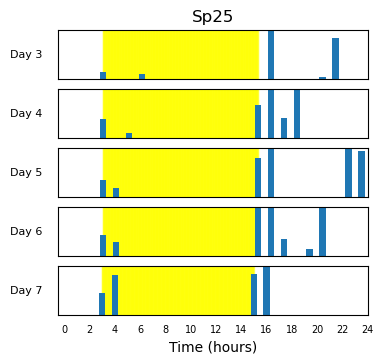

In [53]:
for i in range(25, 26):
    x = f"Sp{i}"
    fig = plt.figure(figsize=(4, 6))
    raster_separate(3, 7, "DD", x, fig)